서상원 (2018)

시스템리스크 측정 방법 중 금융기관의 부도와 같은 위험사건을 명시적으로 정의하는 측정하는 법을 알아본다. 


# 부도확률모형 위험 측정방법

## CDS-DIP : Credit default swap-distress insurance premium

[Huang  et al.(2009)](https://www.sciencedirect.com/science/article/abs/pii/S0378426609001216?via%3Dihub)

- DIP(distress  insurance premium): CDS 시장가격을 이용하여 금융시스템내에 개별 금융기관들이 발행한 CDS들의 가상 포트폴리오(가중치: 금융기관의 부채규모)에 대해서 금융 위험(financial distress) 사건이 발생할 경우 보호받기 위해서 지불하여야 하는 프리미엄을 산출

- CDS 스프레드:
    - 금융기관 $i$의 신용사건을 기초자산으로 하는 CDS 스프레드 $s_{it}$는 해당 금융기관이 위험상황에 처할 경우 발생하는 금융손실의 위험을 보장받을 것을 대가로 '보장' 매입자가 일정기간마다 지불하여야 하는 (원금 대비) 프리미엄 비율
    - 금융기관의 위험확률이 증가하면 CDS 스프레드도 같이 증가하므로 CDS 스프레드 시장가격은 금융기관의 위험도에 대해 시장에서 평가하는 정보를 가짐

- $PD_{it} = \frac{a_{t}s_{it}}{a_t LGD_{it}+b_t s_{it}}$
- $a_t \equiv \int^{t+T}_{t}{e^{-r\tau}d\tau}$
- $b_t \equiv \int^{t+T}_{t}{\tau^{-r\tau}d\tau}$
- $r$은 무위험수익률, $T$는 CDS 계약의 잔존만기, $LGD$는 부도시손실률(loss given default)을 나타냄 

- 이렇게 추정된 부도확률은 위험중립 확률(risk-neutral probability)이므로 이를 이용하여 산출한 DIP을 금융상품의 가격 즉, 프리미엄으로 간주

- 또한 여러 금융기관간 위험 사건의 종속성을 시변하는 상관계수를 이용하여 측정 (향후 12주 후에 대한 상관계수 예측식)
    - $\rho_{t,t+12}=c+k_{1}\rho_{t-12,t}+\sum^{l}_{i=1}k_{2i}\rho_{t-i,t-1+1}+\eta X_t+v_t$
    - $\rho$는 하첨자로 표시된 (일주일 단위의) 두 기간간 평균 자산수익률 상관계수, $X_t$는 예측변수로 사용되는 금융시장 변수

- 예측된 상관계수를 이용하여 DIP을 추정

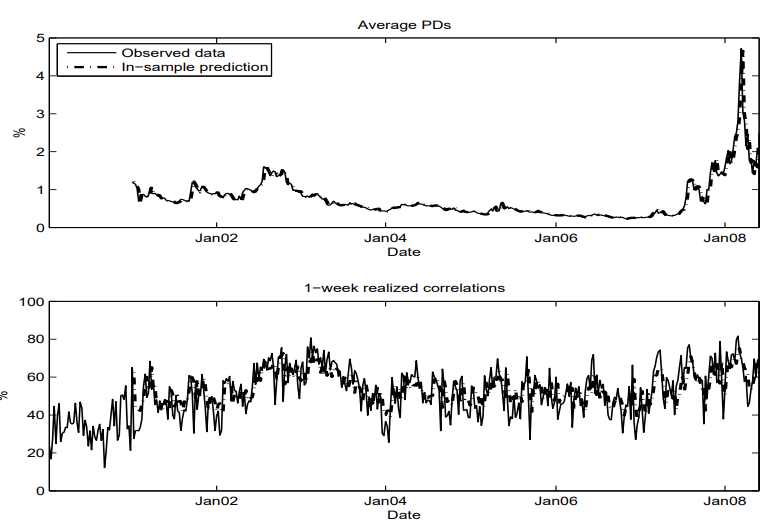

## CDS-CoRisk: Credit default swap-CoRisk

[IMF(2009)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1417920)


금융기관간 위험도의 상호연계성을 CDS 스프레드를 이용하여 측정

- CoRisk는 quantile regression 기법을 사용하여 한 금융기관의 위험 사건 여부가 다른 금융기관에 미치는 영향을 측정
    - $CDS_{it}=\alpha_{\tau}+\sum^{K}_{k=1}\beta_{\tau k}R_{kt}+\gamma_{\tau j}CDS_{jt}+\epsilon_{it}$
    - $\tau$는 백분위수, $R$은 $K$개의 위험요인
    - 위험요인: 일반적인 리스크 프리미엄, 수익률곡선의 기울기, LIBOR 스프레드, 단기자금시장의 유동성 상황, VIX 등

- CDS 스프레드가 높을수록 고위험도를 나타내며, 95 percentile을 상회하는 경우를 위험 사건이 발생한 것으로 간주

- CoRisk (금융기관 $j$에 대한 $i$의 조건부)
    - $Conditional CoRisk_t(i,j) = 100 \times (\frac{CDS(95|j)}{CDS_i(95)}-1 )$
    - $CDS(95|j)=\alpha_{95}+\sum^{K}_{k=1}\beta_{95k}R_{kt}+\gamma_{95j}CDS_j(95)$
    - CoRisk는 한 금융기관의 CDS 스프레드의 무조건부 95 percentile과 다른 금융기관에서 위험 사건이 발생한 경우에 대한 조건부 95 percentile간의 상대적 차이를 나타냄

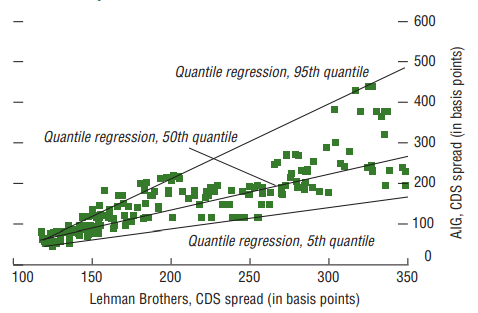


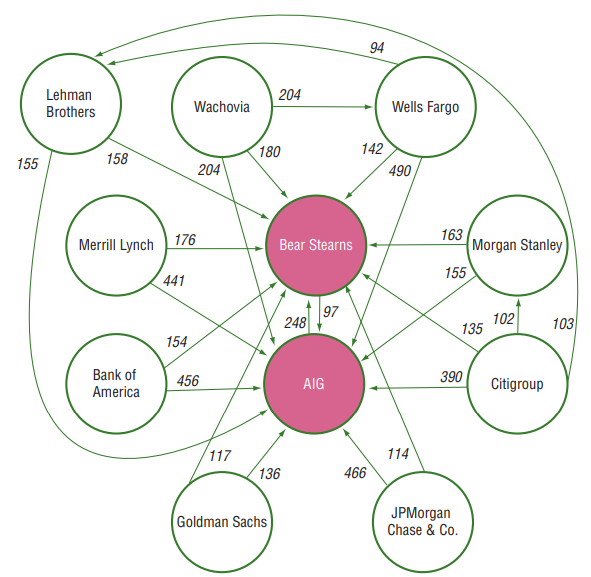

## Option-iPoD : Option-implied probability of default

[Capuano(2008)](https://doi.org/10.5089/9781451870527.001)

옵션가격으로부터  부도확률을  추정

- Merton(1974)의 구조모형을 이용
    - 금융기관의 (시장가치 기준) 자산을 $V$, 부채를 $D$, 자본을 $E$라고 하면, 금융기관의 부도사건은 $V<D$로 정의 
    - 자본은 부채를 먼저 상환하고 남는 부분에 대한 청구권으로서 $E=\max(V-D,0)$
    - 이는 마치 기초자산을 $V$로, 행사가격을 $D$로 하는 콜옵션과 동일한 구조

- 부도확률(PoD):
    - $PoD = \int^{D}_0 fdV$

- 확률밀도함수 $f$ 는 CIMDO 방법을 이용하여 다음과 같이 추정
    - $\min \int^{\infty}_0 f(V)ln(\frac{f(V)}{f^0(V)})dV$
    - 사후 (posterior) 밀도함수 $f$는 사전(prior) 밀도함수 $f^0$ 와의 cross-entropy를 최소화

- 사후 밀도함수의 조건
    - 자본이 콜옵션 가치로 평가됨
        - $E=\int^{\infty}_{D}(V-D)f(V)dV$
    - 행사가격이 $K$인 주식옵션의 가격이 $C$일 때 이 옵션가격과 일치성의 가짐
        - $C=\int^{\infty}_{D+K}(V-D-K)f(V)dV$
    - 확률밀도함수의 면적은 1
        - $1=\int^{\infty}_{0}f(V)dV$
              
- 사후 밀도함수
    - $f(V) = f^0(V)\exp [ \lambda_0-1+\lambda_1e^{-rT}I_{V>D}(V-D)+\lambda_2e^{-rT}I_{V>D+K}(V-D-K) ]$
    - $\lambda_0$는 확률밀도함수의 면적이 1이라는 조건에 대한 라그랑지 승수, $\lambda_1$는 자본이 콜옵션의 가치로 평가된다는 조건에 대한 라그랑지 승수, $\lambda_2$는 주식옵션의 가격이 만족하여야 하는 조건에 대한 라그랑지 승수

## CCA: Contingent claim approach

[Lehar(2005)](https://doi.org/10.1016/j.jbankfin.2004.09.007)

주가에 기업의 부도확률에 대한 정보가 내재되어 있다는 점에 기반하여 주가 정보를 이용하여 내재된 부도확률에 대한 정보를 얻는 방법

- Merton(1974)의 콜옵션 구조모형($E=\max(V-D,0)$)에서 주식이 일종의 콜옵션과 같은 조건부 증권(contingent claim)으로 봄

- 금융기관의 자산 $V$가 다음과 같이 geometric 브라운 운동으로 따른다고 가정
    - $dV=\mu Vdt+\sigma Vdz$
    - 주가 $E$ 는 행사가격이 $D_t$, 기초자산 가격이 $V_t$인 BSM(Black-Scholes-Merton) 콜옵션가격과 동일

- 금융기관의 자산에 대한 확률과정의 모수 $\mu, \sigma$를 금융기관의 주가에 대한 정보를 이용하여 추정
    - 다음의 우도함수를 극대화하도록 추정
    - $L(\mu,\sigma)=-\frac{m-1}{2}\ln(2\pi)-\frac{m-1}{2}\ln\sigma^2 - \sum^{m}_{t=2}\ln \hat{V}_t(\sigma) - \sum^{m}_{t=2}\ln N(\hat{d}_t) - \frac{1}{2\sigma^2}\sum^{m}_{t=2}[\ln\frac{\hat{V}_t(\sigma)}{\hat{V}_{t-1}(\sigma)}]^2$
    - $\hat{V}_t(\sigma)$는 BSM의 콜옵션가격 공식에서 구해지는 해

- 금융기관간의 연계성을 다음과 같이 지수가중 이동평균 방법을 이용하여 모형화
    - 금융기관 $i, j$의 공분산: $\sigma_{ij,t} = \lambda\sigma_{ij,t-1}+(1-\lambda)\ln(\frac{V^i_t}{V^i_{t-1}})\ln(\frac{V^j_t}{V^j_{t-1}})$

- Lehar(2005)는 시스템리스크 측정지표로서 전체 금융시스템 내에 금융기관중 부실금융기관의  수가  일정  비율 (예를  들어, 10%) 이상일  확률을  나타내는 SIN과 자산기준 부실금융기관의 비중이 일정 비율 이상일 확률을 나타내는 SIV 등을 제시

# 참고문헌

- 서상원. (2018). 시스템리스크의 측정과 관리: 서베이와 제언. 금융안정연구, 19(1), 131-232.

- Capuano, C. (2008). The option-iPoD. International Monetary Fund.
- Chan-Lau, J. A., Espinosa, M., Giesecke, K., & Solé, J. A. (2009). Assessing the systemic implications of financial linkages. IMF global financial stability report, 2.
- Huang, X., Zhou, H., & Zhu, H. (2009). A framework for assessing the systemic risk of major financial institutions. Journal of Banking & Finance, 33(11), 2036-2049.
- Lehar, A. (2005). Measuring systemic risk: A risk management approach. Journal of Banking & Finance, 29(10), 2577-2603.